In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [22]:
filename = 'rainfallWB.csv'
df = pd.read_csv(filename)
df.head()

Date           Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0  2002-04-18         Alipurduar     17.4     31.1       0.0          2.7   
1  2019-11-24    Purba Medinipur     20.0     24.8       0.0          4.1   
2  2016-10-29    Purba Medinipur     17.8     25.8       0.0          5.7   
3  2011-04-14         Jalpaiguri     20.7     26.1      70.9          4.4   
4  2011-02-18  Paschim Medinipur     23.6     33.2       0.0          1.9   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       NaN          SW           70.0          S  ...        78.7   
1       7.0           N           22.3         SW  ...        75.7   
2       NaN         NNE           72.9        SSE  ...        83.6   
3       6.6         NNE           47.4          W  ...        74.1   
4       5.9         NNE           45.5        WNW  ...        84.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         47.6       1016.6       1017.1       6.0       2.0     21.1   
1         71.8       1015.8       1015.6       6.0       2.0     24.8   
2         76.2       1018.0       1017.1       1.0       6.0     22.4   
3         44.6       1010.9       1008.9       1.0       4.0     26.3   
4         66.3       1008.7       1007.1       3.0       3.0     27.2   

   Temp3pm  RainToday  RainTomorrow  
0     27.6         No            No  
1     25.7         No            No  
2     21.3         No            No  
3     22.8        Yes           Yes  
4     29.9         No            No  

[5 rows x 23 columns]

In [23]:
fig = px.scatter(df, x='MinTemp', y='MaxTemp', color='RainTomorrow', title='Min Temp vs Max Temp')
fig.show()

In [24]:
fig  = px.scatter(df, x='Humidity9am', y='Temp9am', color='RainTomorrow', title='Humidity at 9am vs Temp at 9am')
fig.show()

In [25]:
fig = px.scatter(df,x='Pressure9am',y='Temp9am',color='RainTomorrow',title='Pressure at 9am vs Temp at 9am')
fig.show()

In [26]:
fig = px.histogram(df, x='RainToday', color='RainTomorrow', title='Distribution of RainToday')
fig.show()

In [37]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()[1:]
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [38]:
# columns cotaining null values
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with null values:", null_columns)

Columns with null values: []


In [39]:
# filling null values with mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Merge with original df (drop original categorical cols)
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df_encoded.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2002-04-18     17.4     31.1       0.0          2.7  6.045945   
1  2019-11-24     20.0     24.8       0.0          4.1  7.000000   
2  2016-10-29     17.8     25.8       0.0          5.7  6.045945   
3  2011-04-14     20.7     26.1      70.9          4.4  6.600000   
4  2011-02-18     23.6     33.2       0.0          1.9  5.900000   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
0           70.0          12.3           3.9         78.7  ...   
1           22.3           9.2          14.2         75.7  ...   
2           72.9           2.2           8.1         83.6  ...   
3           47.4           1.6          13.8         74.1  ...   
4           45.5           8.0           1.0         84.0  ...   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             1.0            0.0           0.0   
1             0.0             0.0            0.0           0.0   
2             0.0             0.0            0.0           0.0   
3             0.0             0.0            0.0           1.0   
4             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes  \
0             0.0             0.0           1.0            0.0   
1             0.0             0.0           1.0            0.0   
2             1.0             0.0           1.0            0.0   
3             0.0             0.0           0.0            1.0   
4             0.0             0.0           1.0            0.0   

   RainTomorrow_No  RainTomorrow_Yes  
0              1.0               0.0  
1              1.0               0.0  
2              1.0               0.0  
3              0.0               1.0  
4              1.0               0.0  

[5 rows x 92 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021'),
  Text(22, 0, '2022'),
  Text(23, 0, '2023'),
  Text(24, 0, '2024'),
  Text(25, 0, '2025')])

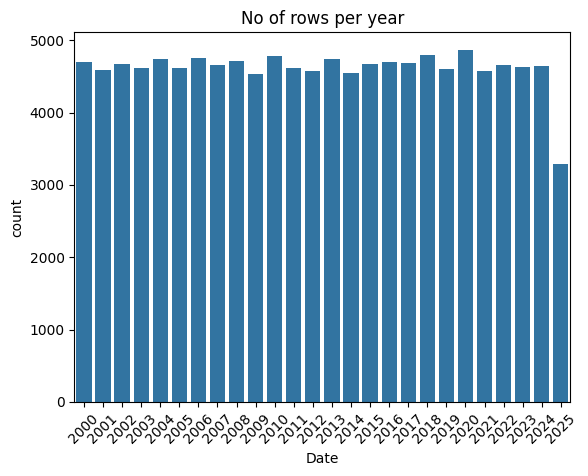

In [41]:
plt.title('No of rows per year')
sns.countplot(x=pd.to_datetime(df['Date']).dt.year, data=df)
plt.xticks(rotation=45)

In [42]:
from sklearn.model_selection import train_test_split    

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print(f'Train shape: {train_df.shape}')
print(f'Validation shape: {val_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (72000, 23)
Validation shape: (24000, 23)
Test shape: (24000, 23)


In [43]:
year = pd.to_datetime(df['Date']).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]
print(f'Train shape: {train_df.shape}')
print(f'Validation shape: {val_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (69865, 23)
Validation shape: (4666, 23)
Test shape: (45469, 23)


In [44]:
train_df

Date           Location  MinTemp  MaxTemp  Rainfall  \
0       2002-04-18         Alipurduar     17.4     31.1       0.0   
3       2011-04-14         Jalpaiguri     20.7     26.1      70.9   
4       2011-02-18  Paschim Medinipur     23.6     33.2       0.0   
6       2002-03-18              Malda     19.3     25.7       0.0   
8       2005-03-06          Kalimpong     23.7     32.5      60.2   
...            ...                ...      ...      ...       ...   
119994  2000-12-09            Hooghly     22.7     23.9      52.7   
119995  2007-09-07   Dakshin Dinajpur     16.9     23.3       0.0   
119996  2012-03-18  South 24 Parganas     28.7     38.9       0.0   
119997  2008-11-20         Darjeeling     18.1     21.0      28.6   
119999  2002-08-15            Kolkata     18.6     30.4      41.1   

        Evaporation   Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
0          2.700000   6.045945          SW      70.000000          S  ...   
3          4.400000   6.600000         NNE      47.400000          W  ...   
4          1.900000   5.900000         NNE      45.500000        WNW  ...   
6          0.900000   4.300000         WNW      32.700000          S  ...   
8          4.038022   6.045945          NW      52.000000        NNE  ...   
...             ...        ...         ...            ...        ...  ...   
119994     7.400000   2.800000           W      37.000000          N  ...   
119995     6.200000   6.045945         WNW      40.125355        NNE  ...   
119996     5.900000   6.900000           W      35.100000        NNW  ...   
119997     4.900000  10.800000         NNW      32.700000        WSW  ...   
119999     4.900000   0.000000           E      27.000000        SSW  ...   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0             78.7         47.6       1016.6       1017.1  6.000000  2.000000   
3             74.1         44.6       1010.9       1008.9  1.000000  4.000000   
4             84.0         66.3       1008.7       1007.1  3.000000  3.000000   
6             66.1         37.9       1006.8       1006.4  1.000000  7.000000   
8             79.4         46.1       1016.4       1016.7  4.005502  5.000000   
...            ...          ...          ...          ...       ...       ...   
119994        76.5         42.4       1013.7       1012.3  4.000000  8.000000   
119995        71.9         49.5       1019.7       1019.2  1.000000  3.998032   
119996        80.2         33.0       1008.6       1011.4  5.000000  0.000000   
119997        88.3         82.2       1011.1       1011.9  0.000000  2.000000   
119999        91.7         46.1       1015.1       1017.6  4.005502  4.000000   

        Temp9am  Temp3pm  RainToday  RainTomorrow  
0          21.1     27.6         No            No  
3          26.3     22.8        Yes           Yes  
4          27.2     29.9         No            No  
6          25.7     24.5         No           Yes  
8          32.7     29.0        Yes           Yes  
...         ...      ...        ...           ...  
119994     24.5     20.9        Yes           Yes  
119995     18.4     25.0         No            No  
119996     30.9     40.1         No            No  
119997     22.7     20.2        Yes           Yes  
119999     20.7     23.5        Yes            No  

[69865 rows x 23 columns]

In [45]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
print(f'Input columns: {input_cols}')
print(f'Target column: {target_col}')

Input columns: ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
Target column: RainTomorrow


In [46]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()
print(f'Numeric columns: {numeric_cols}')   
print(f'Categorical columns: {categorical_cols}')

Numeric columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(df[numeric_cols])
list(imputer.statistics_)

[np.float64(22.003770489030227),
 np.float64(30.01367263864323),
 np.float64(4.957316666666666),
 np.float64(4.038022356294185),
 np.float64(6.045945257298537),
 np.float64(40.12535472400948),
 np.float64(8.054243495618636),
 np.float64(10.0867256187857),
 np.float64(79.786355),
 np.float64(58.511965833333335),
 np.float64(1013.0085883915054),
 np.float64(1013.0030800000001),
 np.float64(4.00550205024764),
 np.float64(3.9980322223588733),
 np.float64(26.005569166666664),
 np.float64(28.002185833333332)]

In [48]:
imputer.transform(train_inputs[numeric_cols])

array([[17.4, 31.1,  0. , ...,  2. , 21.1, 27.6],
       [20.7, 26.1, 70.9, ...,  4. , 26.3, 22.8],
       [23.6, 33.2,  0. , ...,  3. , 27.2, 29.9],
       ...,
       [28.7, 38.9,  0. , ...,  0. , 30.9, 40.1],
       [18.1, 21. , 28.6, ...,  2. , 22.7, 20.2],
       [18.6, 30.4, 41.1, ...,  4. , 20.7, 23.5]], shape=(69865, 16))

In [49]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])
train_inputs.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0         Alipurduar     17.4     31.1       0.0     2.700000  6.045945   
3         Jalpaiguri     20.7     26.1      70.9     4.400000  6.600000   
4  Paschim Medinipur     23.6     33.2       0.0     1.900000  5.900000   
6              Malda     19.3     25.7       0.0     0.900000  4.300000   
8          Kalimpong     23.7     32.5      60.2     4.038022  6.045945   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0          SW           70.0          S        SSW  ...           3.9   
3         NNE           47.4          W          W  ...          13.8   
4         NNE           45.5        WNW          N  ...           1.0   
6         WNW           32.7          S        WSW  ...           9.0   
8          NW           52.0        NNE        SSE  ...          15.3   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         78.7         47.6       1016.6       1017.1  6.000000       2.0   
3         74.1         44.6       1010.9       1008.9  1.000000       4.0   
4         84.0         66.3       1008.7       1007.1  3.000000       3.0   
6         66.1         37.9       1006.8       1006.4  1.000000       7.0   
8         79.4         46.1       1016.4       1016.7  4.005502       5.0   

   Temp9am  Temp3pm  RainToday  
0     21.1     27.6         No  
3     26.3     22.8        Yes  
4     27.2     29.9         No  
6     25.7     24.5         No  
8     32.7     29.0        Yes  

[5 rows x 21 columns]

In [50]:
#scaling feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[numeric_cols])

print(f"Minimum values: {scaler.data_min_}")
print(f"Maximum values: {scaler.data_max_}")

Minimum values: [ -2.1   2.3   0.    0.    0.    0.    0.    0.   25.4   5.  985.2 986.8
   0.    0.    1.9  -1.3]
Maximum values: [  46.6   56.7  224.3   12.4   14.   108.2   24.2   31.4  100.   100.
 1041.2 1042.     8.     8.    50.    50. ]


In [51]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  69865.000000  69865.000000  69865.000000  69865.000000  69865.000000   
mean       0.494666      0.509447      0.022360      0.326053      0.431682   
std        0.102170      0.106451      0.059052      0.147235      0.192875   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.427105      0.437500      0.000000      0.233871      0.314286   
50%        0.494944      0.509443      0.000000      0.325647      0.431853   
75%        0.562628      0.580882      0.000000      0.419355      0.542857   
max        1.000000      0.968750      1.000000      0.991935      1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   69865.000000  69865.000000  69865.000000  69865.000000  69865.000000   
mean        0.370701      0.332597      0.321198      0.729072      0.563089   
std         0.136876      0.158793      0.152874      0.154522      0.183026   
min         0.000000      0.000000      0.000000      0.028150      0.000000   
25%         0.278189      0.219008      0.213376      0.623324      0.441053   
50%         0.370844      0.330579      0.321233      0.731903      0.571579   
75%         0.462107      0.438017      0.423567      0.840483      0.693684   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  69865.000000  69865.000000  69865.000000  69865.000000  69865.000000   
mean       0.496929      0.475041      0.500506      0.499512      0.500739   
std        0.106421      0.114645      0.302797      0.302701      0.112093   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.425000      0.396739      0.250000      0.250000      0.426195   
50%        0.496582      0.474638      0.500688      0.499754      0.501040   
75%        0.567857      0.552536      0.750000      0.750000      0.575884   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  69865.000000  
mean       0.571206  
std        0.120289  
min        0.000000  
25%        0.489279  
50%        0.571150  
75%        0.651072  
max        1.000000

In [52]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

df[categorical_cols].fillna('Unknown', inplace=True)
encoder.fit(df[categorical_cols])

encoder.categories_

C:\Users\KUSHANKUR\AppData\Local\Temp\ipykernel_7200\4285685922.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[array(['Alipurduar', 'Bankura', 'Birbhum', 'Cooch Behar',
        'Dakshin Dinajpur', 'Darjeeling', 'Hooghly', 'Howrah',
        'Jalpaiguri', 'Jhargram', 'Kalimpong', 'Kolkata', 'Malda',
        'Murshidabad', 'Nadia', 'North 24 Parganas', 'Paschim Bardhaman',
        'Paschim Medinipur', 'Purba Bardhaman', 'Purba Medinipur',
        'Purulia', 'South 24 Parganas', 'Uttar Dinajpur'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [53]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Alipurduar',
 'Location_Bankura',
 'Location_Birbhum',
 'Location_Cooch Behar',
 'Location_Dakshin Dinajpur',
 'Location_Darjeeling',
 'Location_Hooghly',
 'Location_Howrah',
 'Location_Jalpaiguri',
 'Location_Jhargram',
 'Location_Kalimpong',
 'Location_Kolkata',
 'Location_Malda',
 'Location_Murshidabad',
 'Location_Nadia',
 'Location_North 24 Parganas',
 'Location_Paschim Bardhaman',
 'Location_Paschim Medinipur',
 'Location_Purba Bardhaman',
 'Location_Purba Medinipur',
 'Location_Purulia',
 'Location_South 24 Parganas',
 'Location_Uttar Dinajpur',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_

In [54]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
train_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
0              Alipurduar  0.400411  0.529412  0.000000     0.217742   
3              Jalpaiguri  0.468172  0.437500  0.316095     0.354839   
4       Paschim Medinipur  0.527721  0.568015  0.000000     0.153226   
6                   Malda  0.439425  0.430147  0.000000     0.072581   
8               Kalimpong  0.529774  0.555147  0.268391     0.325647   
...                   ...       ...       ...       ...          ...   
119994            Hooghly  0.509240  0.397059  0.234953     0.596774   
119995   Dakshin Dinajpur  0.390144  0.386029  0.000000     0.500000   
119996  South 24 Parganas  0.632444  0.672794  0.000000     0.475806   
119997         Darjeeling  0.414784  0.343750  0.127508     0.395161   
119999            Kolkata  0.425051  0.516544  0.183237     0.395161   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       0.431853          SW       0.646950          S        SSW   
3       0.471429         NNE       0.438078          W          W   
4       0.421429         NNE       0.420518        WNW          N   
6       0.307143         WNW       0.302218          S        WSW   
8       0.431853          NW       0.480591        NNE        SSE   
...          ...         ...            ...        ...        ...   
119994  0.200000           W       0.341959          N        ENE   
119995  0.431853         WNW       0.370844        NNE        WSW   
119996  0.492857           W       0.324399        NNW        ESE   
119997  0.771429         NNW       0.302218        WSW        ESE   
119999  0.000000           E       0.249538        SSW         SW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.508264      0.124204     0.714477     0.448421     0.560714   
3           0.066116      0.439490     0.652815     0.416842     0.458929   
4           0.330579      0.031847     0.785523     0.645263     0.419643   
6           0.260331      0.286624     0.545576     0.346316     0.385714   
8           0.276860      0.487261     0.723861     0.432632     0.557143   
...              ...           ...          ...          ...          ...   
119994      0.119835      0.270701     0.684987     0.393684     0.508929   
119995      0.512397      0.426752     0.623324     0.468421     0.616071   
119996      0.446281      0.544586     0.734584     0.294737     0.417857   
119997      0.342975      0.636943     0.843164     0.812632     0.462500   
119999      0.479339      0.445860     0.888740     0.432632     0.533929   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  \
0          0.548913  0.750000  0.250000  0.399168  0.563353        No   
3          0.400362  0.125000  0.500000  0.507277  0.469786       Yes   
4          0.367754  0.375000  0.375000  0.525988  0.608187        No   
6          0.355072  0.125000  0.875000  0.494802  0.502924        No   
8          0.541667  0.500688  0.625000  0.640333  0.590643       Yes   
...             ...       ...       ...       ...       ...       ...   
119994     0.461957  0.500000  1.000000  0.469854  0.432749       Yes   
119995     0.586957  0.125000  0.499754  0.343035  0.512671        No   
119996     0.445652  0.625000  0.000000  0.602911  0.807018        No   
119997     0.454710  0.000000  0.250000  0.432432  0.419103       Yes   
119999     0.557971  0.500688  0.500000  0.390852  0.483431       Yes   

        Location_Alipurduar  Location_Bankura  Location_Birbhum  \
0                       1.0               0.0               0.0   
3                       0.0               0.0               0.0   
4                       0.0               0.0               0.0   
6                       0.0               0.0               0.0   
8                       0.0               0.0               0.0   
...                     ...               ...               ...   
119994                  0.0               0.0       

In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [59]:
print(train_df[numeric_cols + categorical_cols].columns.tolist())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [61]:
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'Feature': numeric_cols + encoded_cols,
    'Coefficient': model.coef_.tolist()[0]
})
weight_df

Feature  Coefficient
0          MinTemp    -0.028394
1          MaxTemp    -0.177152
2         Rainfall    -0.030584
3      Evaporation     0.050510
4         Sunshine    -0.084478
..             ...          ...
84    WindDir3pm_W    -0.046581
85  WindDir3pm_WNW     0.005132
86  WindDir3pm_WSW    -0.067290
87    RainToday_No    -1.635490
88   RainToday_Yes     1.016616

[89 rows x 2 columns]

<Axes: xlabel='Coefficient', ylabel='Feature'>

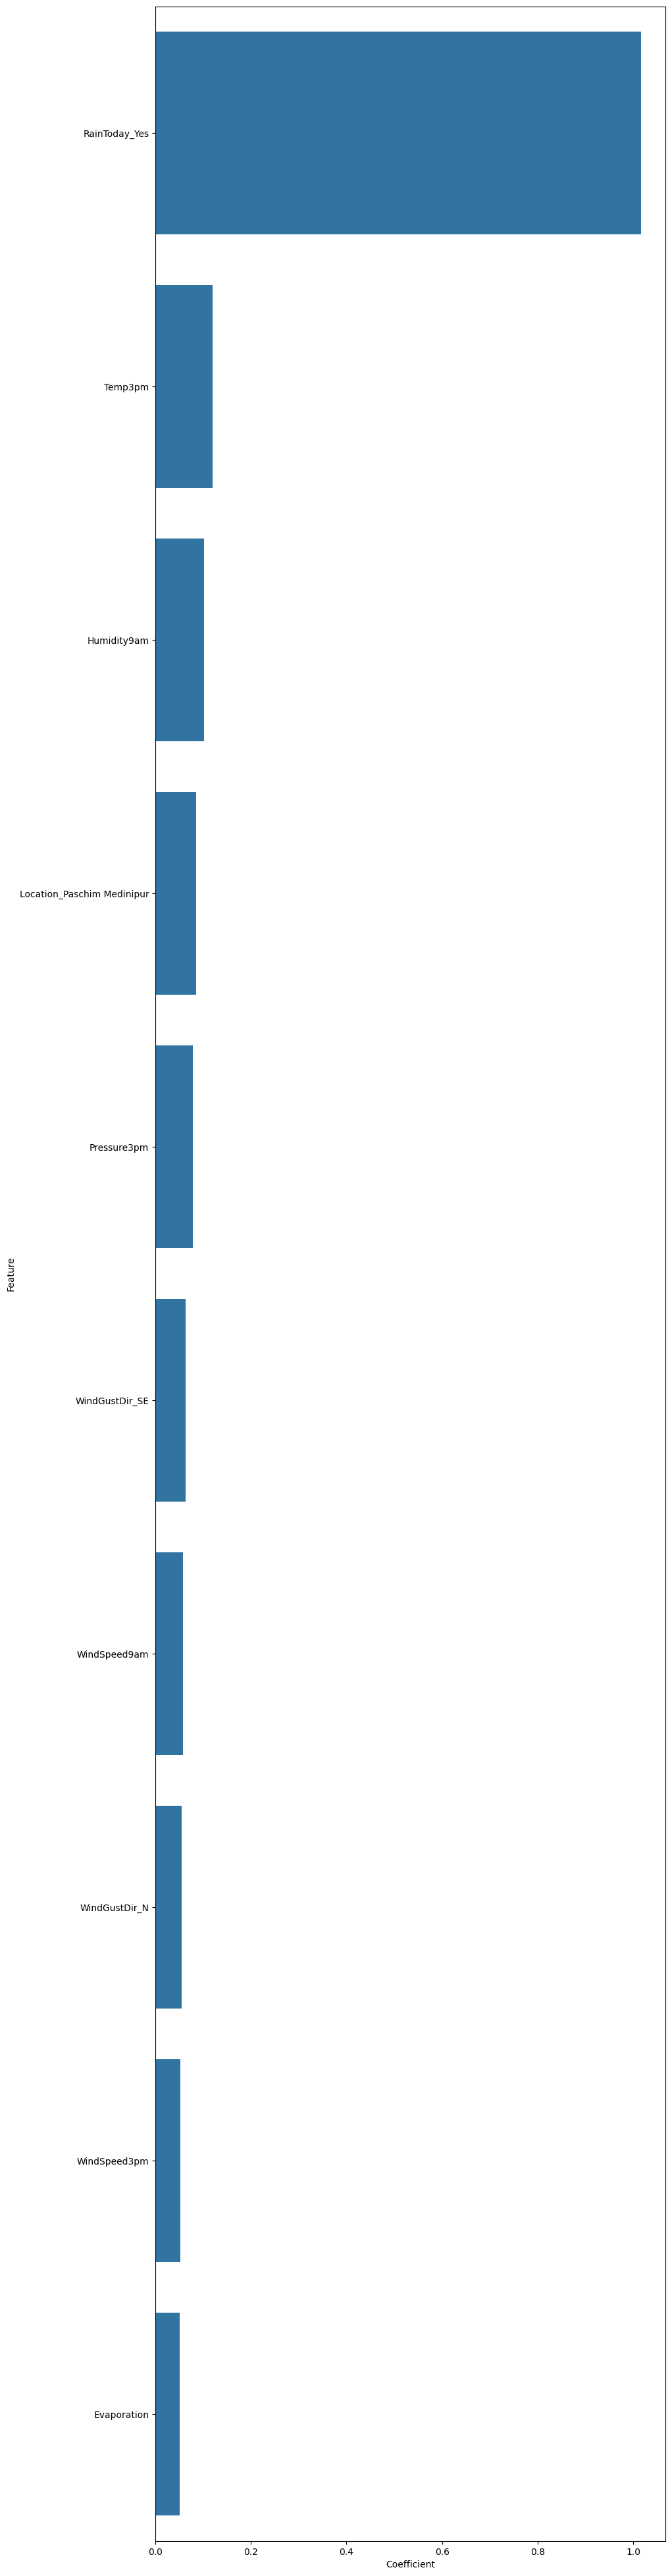

In [62]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df.sort_values(by='Coefficient', ascending=False).head(10), x='Coefficient', y='Feature')

In [63]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [64]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
print(f'Train accuracy: {accuracy_score(train_targets, train_preds)}')
print(f'Validation accuracy: {accuracy_score(val_targets, val_preds)}')
print(f'Test accuracy: {accuracy_score(test_targets, test_preds)}')

Train accuracy: 0.8282544908036928
Validation accuracy: 0.8227603943420488
Test accuracy: 0.8306978380874882


In [67]:

from sklearn.metrics import confusion_matrix

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(6,4))
    sns.heatmap(cf, annot=True)
    plt.title(f'Confusion Matrix {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    return preds

In [76]:
# creating function to predict 
def predict_rain(input_data):
    new_input_df = pd.DataFrame([input_data])
    new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
    new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
    new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

    X_new_input = new_input_df[numeric_cols + encoded_cols]

    prob_pred = model.predict_proba(X_new_input)
    print(f"Probability of No Rain Tomorrow: {prob_pred[0][0]*100:.2f}%")
    print(f"Probability of Rain Tomorrow: {prob_pred[0][1]*100:.2f}%")

    return [prob_pred[0][0]*100, prob_pred[0][1]*100]


In [ ]:
import random
import datetime
input_data = {
    "Location": random.choice(df['Location'].dropna().unique().tolist()),
    "MinTemp": random.uniform(10.0, 25.0),
    "MaxTemp": random.uniform(25.0, 40.0),
    "Rainfall": random.uniform(0.0, 20.0),
    "Evaporation": random.uniform(0.0, 10.0),
    "Sunshine": random.uniform(0.0, 10.0),
    "WindGustDir": random.choice(df['WindGustDir'].dropna().unique().tolist()),
    "WindGustSpeed": random.uniform(20.0, 50.0),
    "WindDir9am": random.choice(df['WindDir9am'].dropna().unique().tolist()),
    "WindDir3pm": random.choice(df['WindDir3pm'].dropna().unique().tolist()),
    "WindSpeed9am": random.uniform(5.0, 20.0),
    "WindSpeed3pm": random.uniform(5.0, 20.0),
    "Humidity9am": random.uniform(30.0, 90.0),
    "Humidity3pm": random.uniform(30.0, 90.0),
    "Pressure9am": random.uniform(1000.0, 1020.0),
    "Pressure3pm": random.uniform(1000.0, 1020.0),
    "Cloud9am": random.uniform(0.0, 8.0),
    "Cloud3pm": random.uniform(0.0, 8.0),
    "Temp9am": random.uniform(15.0, 35.0),
    "Temp3pm": random.uniform(20.0, 40.0),
    "RainToday": random.choice(['Yes', 'No'])
}

#printing the input data
print("Input data for prediction:")
for key, value in input_data.items():
    print(f"{key}: {value}")
prediction = predict_rain(input_data)

with open("prediction_log.txt", "a") as log_file:
    log_file.write(f"\n--- Prediction Run at {datetime.datetime.now()} ---\n")
    for key, value in input_data.items():
        log_file.write(f"{key}: {value}\n")
    log_file.write(f"Prediction (RainTomorrow): {prediction[1]:.2f}%\n")
    log_file.write("-" * 50 + "\n")

print("\nPrediction logged successfully.")

Input data for prediction:
Location: Kolkata
MinTemp: 18.909045225024684
MaxTemp: 28.809695154771187
Rainfall: 4.156259072377814
Evaporation: 4.404444926888242
Sunshine: 1.5267490826356245
WindGustDir: NE
WindGustSpeed: 43.8989250165685
WindDir9am: NE
WindDir3pm: E
WindSpeed9am: 9.982743076761647
WindSpeed3pm: 7.204370953245823
Humidity9am: 74.58556894882335
Humidity3pm: 56.48718363637657
Pressure9am: 1014.8664476234663
Pressure3pm: 1012.6715880477002
Cloud9am: 2.832414133853792
Cloud3pm: 0.6010078482957031
Temp9am: 33.79308394788571
Temp3pm: 35.05738326684857
RainToday: Yes
Probability of No Rain Tomorrow: 41.77%
Probability of Rain Tomorrow: 58.23%

Prediction logged successfully.
